In [58]:
import os
import ROOT

In [153]:
# get histograms
ERA = "2018"
REGION = "SR3Mu"
MASSPOINT = "MHc-160_MA-85"
BKG = "diboson"
lumiString = {
    "2016preVFP": "L_{int} = 19.5 fb^{-1}",
    "2016postVFP": "L_{int} = 16.8 fb^{-1}",
    "2017": "L_{int} = 41.5 fb^{-1}",
    "2018": "L_{int} = 59.8 fb^{-1}"
}

# signal
f = ROOT.TFile(f"/home/choij/workspace/ChargedHiggsAnalysis/data/PromptEstimator/{ERA}/Skim3Mu__GraphNet__ScaleVar__WeightVar__/PromptEstimator_TTToHcToWAToMuMu_{MASSPOINT}.root")
h_sig = f.Get(f"{REGION}/Central/{MASSPOINT}/score_{BKG}"); h_sig.SetDirectory(0)
f.Close()
h_sig.Scale(1./h_sig.Integral())
h_sig.SetStats(0)
h_sig.SetLineColor(ROOT.kBlack)
h_sig.SetLineWidth(2)
h_sig.SetFillColorAlpha(ROOT.kBlack, 0.3)

# nonprompt
f = ROOT.TFile(f"/home/choij/workspace/ChargedHiggsAnalysis/data/MatrixEstimator/{ERA}/Skim3Mu__GraphNet__/DATA/MatrixEstimator_SkimTree_SS2lOR3l_DoubleMuon.root")
h_nonprompt = f.Get(f"{REGION}/Central/{MASSPOINT}/score_{BKG}"); h_nonprompt.SetDirectory(0)
f.Close()
h_nonprompt.Scale(1./h_nonprompt.Integral())
h_nonprompt.SetStats(0)
h_nonprompt.SetLineColor(ROOT.kGray+1)
h_nonprompt.SetLineWidth(2)
if BKG == "nonprompt":
    h_nonprompt.SetFillColorAlpha(ROOT.kGray+1, 0.3)
else:
    h_nonprompt.SetFillColorAlpha(ROOT.kGray+1, 0.1)


# diboson
f = ROOT.TFile(f"/home/choij/workspace/ChargedHiggsAnalysis/data/PromptEstimator/{ERA}/Skim3Mu__GraphNet__ScaleVar__WeightVar__/PromptEstimator_SkimTree_SS2lOR3l_WZTo3LNu_amcatnlo.root")
h = f.Get(f"{REGION}/Central/{MASSPOINT}/score_{BKG}"); h.SetDirectory(0); f.Close()
h_diboson = h.Clone("diboson")
f = ROOT.TFile(f"/home/choij/workspace/ChargedHiggsAnalysis/data/PromptEstimator/{ERA}/Skim3Mu__GraphNet__ScaleVar__WeightVar__/PromptEstimator_SkimTree_SS2lOR3l_ZZTo4L_powheg.root")
h = f.Get(f"{REGION}/Central/{MASSPOINT}/score_{BKG}"); h.SetDirectory(0); f.Close()
h_diboson.Add(h)
h_diboson.Scale(1./h_diboson.Integral())
h_diboson.SetStats(0)
h_diboson.SetLineColor(ROOT.kGreen)
h_diboson.SetLineWidth(2)
if BKG == "diboson":
    h_diboson.SetFillColorAlpha(ROOT.kGreen, 0.3)
else:
    h_diboson.SetFillColorAlpha(ROOT.kGreen, 0.1)

# ttZ
f = ROOT.TFile(f"/home/choij/workspace/ChargedHiggsAnalysis/data/PromptEstimator/{ERA}/Skim3Mu__GraphNet__ScaleVar__WeightVar__/PromptEstimator_SkimTree_SS2lOR3l_ttZToLLNuNu.root")
h = f.Get(f"{REGION}/Central/{MASSPOINT}/score_{BKG}"); h.SetDirectory(0); f.Close()
h_ttZ = h.Clone("ttZ")
f = ROOT.TFile(f"/home/choij/workspace/ChargedHiggsAnalysis/data/PromptEstimator/{ERA}/Skim3Mu__GraphNet__ScaleVar__WeightVar__/PromptEstimator_SkimTree_SS2lOR3l_ttWToLNu.root")
h = f.Get(f"{REGION}/Central/{MASSPOINT}/score_{BKG}"); h.SetDirectory(0); f.Close()
h_ttZ.Add(h)
f = ROOT.TFile(f"/home/choij/workspace/ChargedHiggsAnalysis/data/PromptEstimator/{ERA}/Skim3Mu__GraphNet__ScaleVar__WeightVar__/PromptEstimator_SkimTree_SS2lOR3l_ttHToNonbb.root")
h = f.Get(f"{REGION}/Central/{MASSPOINT}/score_{BKG}"); h.SetDirectory(0); f.Close()
h_ttZ.Add(h)
h_ttZ.Scale(1./h_ttZ.Integral())
h_ttZ.SetStats(0)
h_ttZ.SetLineColor(ROOT.kViolet)
h_ttZ.SetLineWidth(2)
if BKG == "ttZ":
    h_ttZ.SetFillColorAlpha(ROOT.kViolet, 0.3)
else:
    h_ttZ.SetFillColorAlpha(ROOT.kViolet, 0.1)

lg = ROOT.TLegend(0.65, 0.65, 0.87, 0.85)
lg.SetFillStyle(0)
lg.SetBorderSize(0)
lg.AddEntry(h_sig, MASSPOINT, "f")
lg.AddEntry(h_nonprompt, "nonprompt", "f")
lg.AddEntry(h_diboson, "diboson", "f")
lg.AddEntry(h_ttZ, "tt+X", "f")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file plots/2018/SR3Mu/scores/MHc-160_MA-85_vs_diboson.png has been created


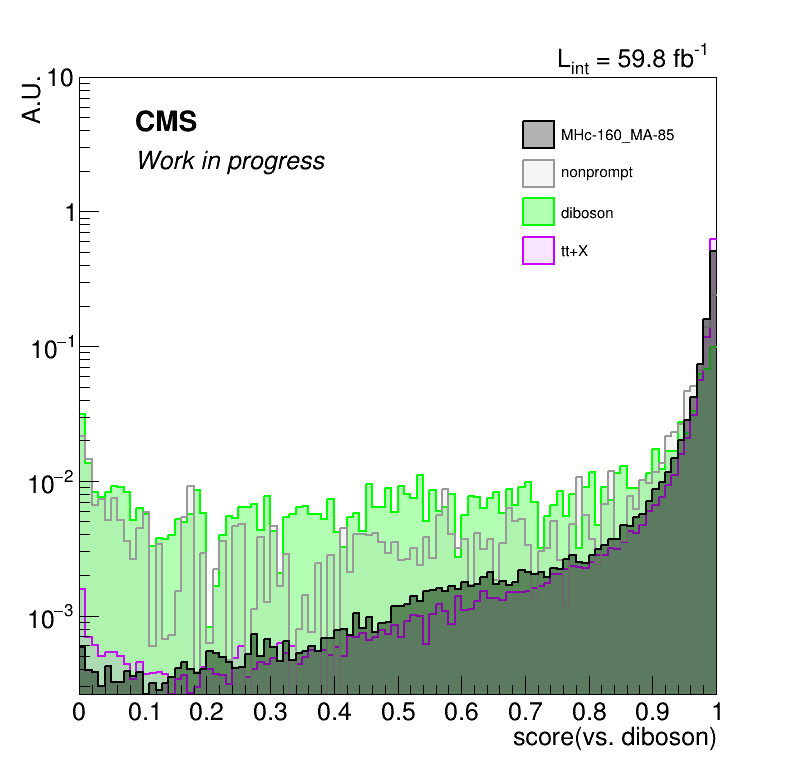

In [154]:
h_sig.GetYaxis().SetRangeUser(max(h_sig.GetMinimum(), 1e-4), 10.)
h_sig.GetXaxis().SetTitle(f"score(vs. {BKG})")
h_sig.GetYaxis().SetTitle("A.U.")
h_sig.GetYaxis().SetTitleOffset(1.1)
text = ROOT.TLatex()

c = ROOT.TCanvas("c", "", 800, 800)
c.SetLogy()
c.cd()
h_sig.Draw("hist")
h_diboson.Draw("f&hist&same")
h_ttZ.Draw("&hist&same")
h_nonprompt.Draw("f&hist&same")
h_sig.Draw("hist&same")
lg.Draw("same")

text.SetTextSize(0.04)
text.SetTextFont(61)
text.DrawLatexNDC(0.17, 0.83, "CMS")

text.SetTextSize(0.035)
text.SetTextFont(52)
text.DrawLatexNDC(0.17, 0.78, "Work in progress")

text.SetTextSize(0.035)
text.SetTextFont(42)
text.DrawLatexNDC(0.7, 0.912, lumiString[ERA])
c.RedrawAxis()
c.Draw()
os.makedirs(f"plots/{ERA}/{REGION}/scores", exist_ok=True)
c.SaveAs(f"plots/{ERA}/{REGION}/scores/{MASSPOINT}_vs_{BKG}.png")

